In [ ]:
from geoscilabs.inversion.LinearInversionDirect import LinearInversionDirectApp
from ipywidgets import interact, FloatSlider, ToggleButtons, IntSlider, FloatText, IntText
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 14

In [ ]:
app = LinearInversionDirectApp()

# Linear Inversion App

This app is based upon the inversion tutorial: "INVERSION FOR APPLIED GEOPHYSICS" by Oldenburg and Li (2005).

Douglas W. Oldenburg and Yaoguo Li (2005) 5. Inversion for Applied Geophysics: A Tutorial. Near-Surface Geophysics: pp. 89-150.
eISBN: 978-1-56080-171-9 
print ISBN: 978-1-56080-130-6 
https://doi.org/10.1190/1.9781560801719.ch5 


## Purpose

We to illustrate how a generic linear inverse problem can be solved using a Tikhonov approach. The App is dvided into two sections. 

### Forward Problem
- Step 1: Create a model, $\mathbf{m}$.
- Step 2: Generate a sensitivity matrix $\mathbf{G}$.
- Step 3: Simulate data ($\mathbf{d} = \mathbf{G}\mathbf{m}$) and add noise.

These steps are explored individually but additional text given in CNArticleXXXX. For convenience, the widgets used to carry out all three steps are consolidated at the end of the section. A brief mathematical discription is also provided.
 
### Inverse Problem
 
Here we provide widgets to adjust the parameters for the inverse problem. Some basic information is provided but details about the parameters are provided in the text CNArticleXXXX. 
 
The default parameters provided for the Forward and Inverse problems generate a reasonable example for illustrating the inversion but the learning comes when these paramters are changed and outcomes are observed. 

## Mathematical Background for Forward Problem


Let $g_j(x)$ denote the kernel function for $j$th datum. With a given model $m(x)$, the $j$th datum can be computed by solving following integral equation:

 $$ d_j = \int_a^{b} g_j(x) m(x) dx $$

where 

$$ g_j(x) = e^{p_jx} cos (2 \pi q_jx) $$ 

is the $j^{th}$ kernel function. By integrating $g_j(x)$ over cells of width $\Delta x$ and using the midpoint rule cell  we obtain the sensitivities 

$$ \mathbf{g}_j(\mathbf{x}) = e^{p_j\mathbf{x}} cos (2 \pi q_j \mathbf{x}) \Delta x$$

where

- $\mathbf{g}_j$: $j$th row vector for the sensitivty matrix ($1 \times M$)
- $\mathbf{x}$: model location ($1 \times M$)
- $p_j$: decaying constant (<0)
- $q_j$: oscillating constant (>0)

By stacking multiple rows of $\mathbf{g}_j$, we obtain sensitivity matrix, $\mathbf{G}$: 

\begin{align}
    \mathbf{G} = 
    \begin{bmatrix}
        \mathbf{g}_1\\
        \vdots\\
        \mathbf{g}_{N}
    \end{bmatrix}
\end{align}

Here, the size of the matrix $\mathbf{G}$ is $(N \times M)$. 
Finally data, $\mathbf{d}$, can be written as a linear equation:

$$ \mathbf{d} = \mathbf{G}\mathbf{m}$$

where $\mathbf{m}$ is an inversion model; this is a column vector ($M \times 1$). 

In real measurments, there will be various noise sources, and hence observation, $\mathbf{d}^{obs}$, can be written as 

$$ \mathbf{d}^{obs} = \mathbf{G}\mathbf{m} + \mathbf{noise}$$


##  Step 1: Create a model, $\mathbf{m}$

The model $m$ is a function defined on the interval [0,1] and discretized into $M$ equal intervals. It is the sum of a: (a) background $m_{background}$, (b) box car $m1$ and (c) Gaussian $m2$. 

- `m_background` : background value

The box car is defined by
- `m1` : amplitude
- `m1_center` : center
- `m1_width` : width

The Gaussian is defined by 
- `m2` : amplitude
- `m2_center` : center
- `m2_sigma` : width of Gaussian (as defined by a standard deviation $\epsilon$)
- `M` : number of model parameters


In [ ]:
Q_model = app.interact_plot_model()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m$_{background}$', max=2.0,…

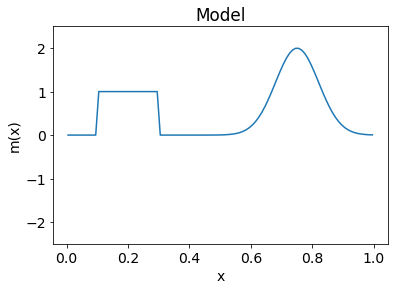

In [ ]:
app.return_axis = True
ax = app.plot_model_only(
    m_background = 0.,
    m1 = 1,
    m1_center = 0.2,
    dm1 = 0.2,
    m2 = 2,
    m2_center = 0.75,
    sigma_2 = 0.07,
    M=100
)
ax.set_xlabel("x")
app.return_axis = False

##  Step 2: Generate a sensitivity matrix, $\mathbf{G}$

By using the following app, we explore each row vector, $\mathbf{g}_j$, of the kernel or sensitivity matrix , $\mathbf{G}$. Parameters of the apps are:

- `M`: number of model parameters
- `N`: number of data
- `pmin`, `pmax`: minimum and maximum of the $M$-length range of decaying constant values (<0)
- `qmin`, `qmax`: minimum and maximum of the $M$-length range of oscillating constant values (>0)
- `ymin`, `ymax`: minimum and maximum of the y-axis

In [ ]:
Q_kernel = app.interact_plot_G()

interactive(children=(IntSlider(value=20, continuous_update=False, description='N', min=1), IntSlider(value=10…

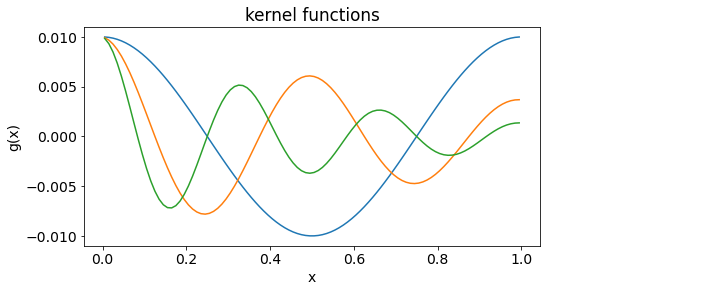

In [ ]:
#plot for 3 kernels
app.return_axis = True
axs = app.plot_G(
    N=3,
    M=100,
    pmin=0,
    pmax=-2,
    qmin=1,
    qmax=3,
    scale='log',
    fixed=False,
    ymin=-0.005,
    ymax=0.011,
)
axs[0].set_title("kernel functions")
app.return_axis = False;

## Step 3: Simulate data, $\mathbf{d}=\mathbf{Gm}$, and add noise

The $j$-th datum is the inner product of the $j$-th kernel $g_j(x)$ and the model $m(x)$. In discrete form it can be written as the dot product of the vector $\mathbf{g}_j$ and the model vector $\mathbf{m}$.

$$ d_j = \mathbf{g}_j \mathbf{m} $$

If there are $N$ data, these data can be written as a column vector, $\mathbf{d}$:

\begin{align}
    \mathbf{d} = \mathbf{G}\mathbf{m} = 
    \begin{bmatrix}
        d_1\\
        \vdots\\
        d_{N}
    \end{bmatrix}
\end{align}

### Adding Noise

Observational data are always contaminated with noise. Here we add Gaussian noise $N(0,\epsilon)$ (zero mean and standard deviation $\epsilon$). Here we choose 

$$ \epsilon = \% |d| + \text{floor} $$

In [ ]:
app.reset_to_defaults()
Q_data = app.interact_plot_data()

interactive(children=(Checkbox(value=False, description='add_noise'), FloatText(value=0.0, description='percen…

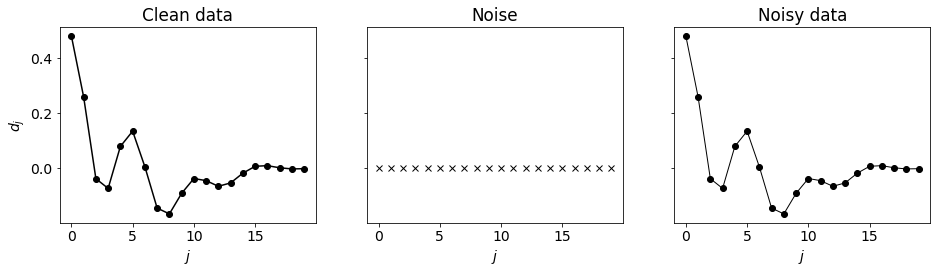

In [ ]:
#plot accurate data
app.return_axis = True
ax = app.plot_data_only(
    add_noise=True,
    percentage=0,
    floor=0.0,    
)
app.return_axis = False

## Composite Widget for Forward Modelling

In [ ]:
app.interact_plot_all_three_together()

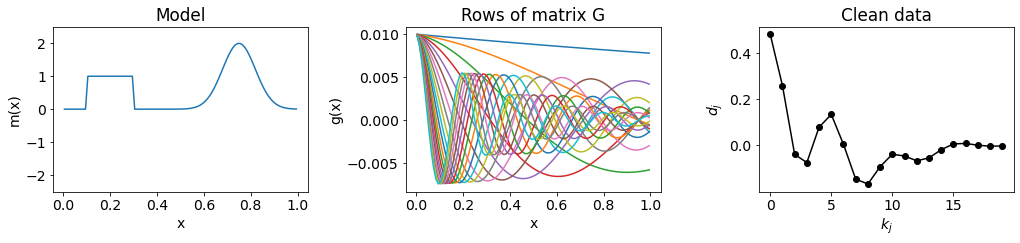

In [ ]:
# Default parameters: accurate data
app.return_axis = True
axs = app.plot_model(
    m_background = 0,
    m1 = 1,
    m2 = 2,
    m1_center = 0.2,
    dm1 = 0.2,
    m2_center = 0.75,
    sigma_2 = 0.07,
    percentage = 0,
    floor = 0.0,
    pmin=-0.25,
    pmax=-3,
    qmin=0.,
    qmax=5,    
    
)    
axs[0].set_title("Model")
app.return_axis = False

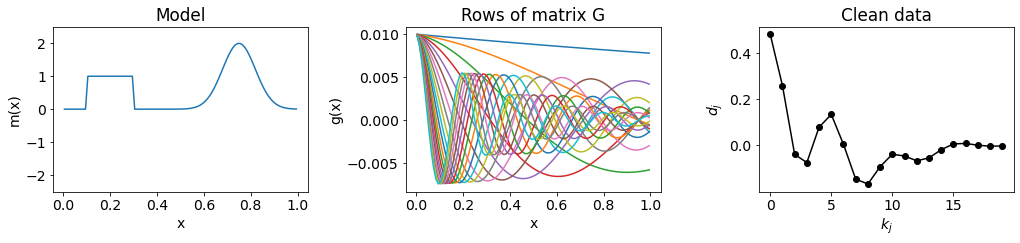

In [ ]:
# Default parameters: noisey data
app.return_axis = True
axs = app.plot_model(
    m_background = 0,
    m1 = 1,
    m2 = 2,
    m1_center = 0.2,
    dm1 = 0.2,
    m2_center = 0.75,
    sigma_2 = 0.07,
    percentage = 0,
    floor = 0.03,
    pmin=-0.25,
    pmax=-3,
    qmin=0.,
    qmax=5,    
    
)    
axs[2].set_title("Noisy data")
app.return_axis = False

## Inverse Problem

In the inverse problem we attempt to find the model $\mathbf{m}$ that gave rise to the observational data $\mathbf{d}^{obs}$. The inverse problem is formulated as an optimization problem: 


$$\text{minimize} \ \ \ \phi(\mathbf{m}) = \phi_d(\mathbf{m}) + \beta \phi_m(\mathbf{m}) $$

where 

- $\phi_d$: data misfit
- $\phi_m$: model regularization
- $\beta$: trade-off (Tikhonov) parameter  $0<\beta<\infty$

Data misfit is defined as 

$$ \phi_d = \sum_{j=1}^{N}\Big(\frac{\mathbf{g}_j\mathbf{m}-d^{obs}_j}{\epsilon_j}\Big)^2$$

where $\epsilon_j$  is an estimate of the standard deviation of the $j$th datum.

The model regularization term, $\phi_m$, can be written as 

$$ \phi_m(\mathbf{m}) = \alpha_s \int \left(\mathbf{m}-\mathbf{m}_{ref}\right)^2 dx + \alpha_x \int \left(\frac{d \mathbf{m}}{dx}\right)^2 dx$$

The first term is referred to as the "smallness" term. Minimizing this generates a model that is close to a reference model $\mathbf{m}_{ref}$. The second term penalizes roughness of the model. It is generically referred to as a "flattest" or "smoothness" term.  

## Step 4: Invert the data, and explore inversion results

In the inverse problem we define parameters needed to evaluate the data misfit and the model regularization terms. We then deal with parameters associated with the inversion.

### Parameters

- `mode`: `Run` or `Explore`
    - `Run`: Each click of the app, will run `n_beta` inversions
    - `Explore`: Not running inversions, but explore result of the previously run inversions

#### Misfit
- `percent`: estiamte uncertainty as a percentage of the data (%)

- `floor`: estimate uncertainty floor

- `chifact`: chi factor for stopping criteria (when $\phi_d^{\ast}=N \rightarrow$ `chifact=1`)

#### Model norm
- `mref`: reference model

- `alpha_s`: $\alpha_s$ weight for smallness term

- `alpha_x`: $\alpha_x$ weight for smoothness term

#### Beta
- `beta_min`: minimum $\beta$

- `beta_max`: maximum $\beta$

- `n_beta`: the number of $\beta$

#### Plotting options

- `data`: `obs & pred` or `normalized misfit`
    - `obs & pred`: show observed and predicted data
    - `normalized misfit`: show normalized misfit

- `tikhonov`: `phi_d & phi_m` or `phi_d vs phi_m`
    - `phi_d & phi_m`: show $\phi_d$ and $\phi_m$ as a function of $\beta$
    - `phi_d vs phi_m`: show tikhonov curve
    
- `i_beta`: i-th $\beta$ value

- `scale`: `linear` or `log`
    - `linear`: linear scale for plotting the third panel
    - `log`: log scale for plotting the third panel     

In [ ]:
app.interact_plot_inversion()

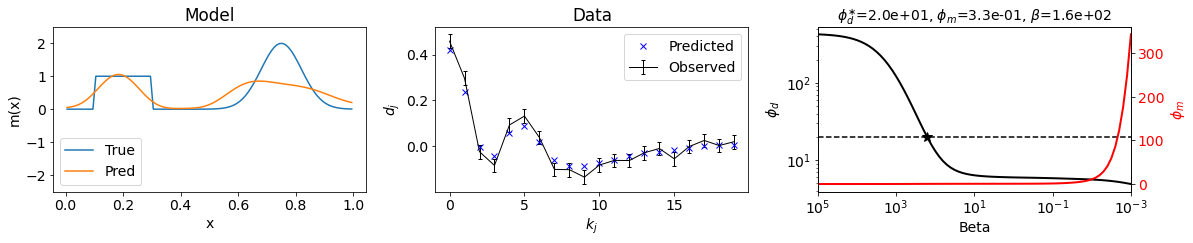

In [ ]:
app.return_axis = True
axs = app.plot_inversion(
    mode="Run", #"Explore"
    mref=0.0,
    percentage=app.percentage,
    floor=app.floor,
    beta_min=1e-3,
    beta_max=1e5,
    n_beta=81,
    alpha_s=1,
    alpha_x=0,
    tikhonov="phi_d & phi_m",
    data_option="obs & pred",
    scale="log",
    i_beta=0,
    chifact=1,
)
# axs[2].set_title('Hello!')
app.return_axis = False